In [103]:
import pandas as pd 
import glob
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [104]:
path_to_xlsx = 'G:\\My Drive\\DataFiles\\Full_Image_List_6.5.24\\all_elements_with_part_type.xlsx'

In [105]:
all_elements = pd.read_excel(path_to_xlsx)

In [106]:
# Split the keywords into lists
all_elements['keywords_list'] = all_elements['keywords'].str.split(';')

# Filter the DataFrame for rows containing 'CK_Lunar Eclipse' in the keywords_list
filtered_df = all_elements[all_elements['keywords_list'].apply(lambda x: 'CK_Lunar Eclipse' in x)]

# Drop duplicates based on the 'images' column
lunar_eclipse = filtered_df.drop_duplicates(subset='images')

# Drop the 'keywords_list' column as it was only needed for filtering
lunar_eclipse = lunar_eclipse.drop(columns=['keywords_list'])

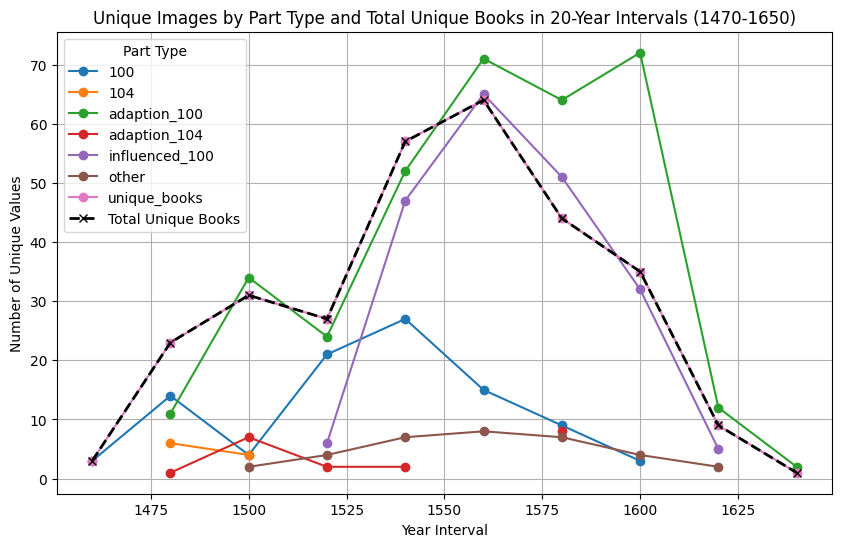

In [107]:
# Create 20-year intervals
lunar_eclipse['interval'] = (lunar_eclipse['year'] // 20) * 20

# Group by interval and part type and count unique images
grouped_images = lunar_eclipse.groupby(['interval', 'part_type'])['images'].nunique().reset_index()

# Pivot the DataFrame for plotting
pivot_images_df = grouped_images.pivot(index='interval', columns='part_type', values='images')

# Group by interval and count unique book values
grouped_books = lunar_eclipse.groupby('interval')['book'].nunique().reset_index()
grouped_books.rename(columns={'book': 'unique_books'}, inplace=True)
grouped_books.set_index('interval', inplace=True)

# Combine the data for plotting
combined_df = pivot_images_df.join(grouped_books)

# Plot the data
ax = combined_df.plot(kind='line', marker='o', figsize=(10, 6))
combined_df['unique_books'].plot(ax=ax, color='black', linestyle='--', marker='x', linewidth=2, label='Total Unique Books')

plt.xlabel('Year Interval')
plt.ylabel('Number of Unique Values')
plt.title('Unique Images by Part Type and Total Unique Books in 20-Year Intervals (1470-1650)')
plt.legend(title='Part Type')
plt.grid(True)
plt.show()


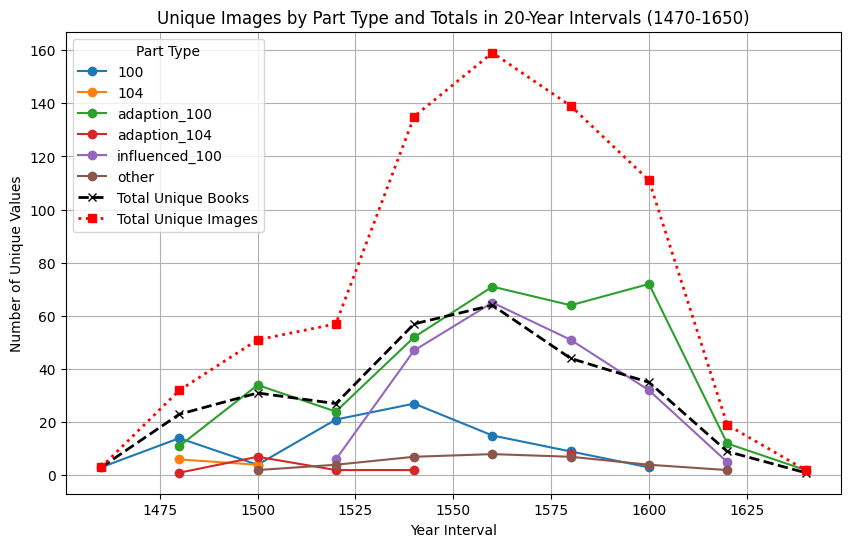

In [108]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming lunar_eclipse is your DataFrame with columns 'images', 'part_type', 'year', and 'book'

# Create 20-year intervals
lunar_eclipse['interval'] = (lunar_eclipse['year'] // 20) * 20

# Group by interval and part type and count unique images
grouped_images = lunar_eclipse.groupby(['interval', 'part_type'])['images'].nunique().reset_index()

# Pivot the DataFrame for plotting
pivot_images_df = grouped_images.pivot(index='interval', columns='part_type', values='images')

# Group by interval and count unique book values
grouped_books = lunar_eclipse.groupby('interval')['book'].nunique().reset_index()
grouped_books.set_index('interval', inplace=True)

# Group by interval and count total unique images
grouped_total_images = lunar_eclipse.groupby('interval')['images'].nunique().reset_index()
grouped_total_images.set_index('interval', inplace=True)

# Plot the data
ax = pivot_images_df.plot(kind='line', marker='o', figsize=(10, 6))

# Add the line for total unique books
grouped_books['book'].plot(ax=ax, color='black', linestyle='--', marker='x', linewidth=2, label='Total Unique Books')

# Add the line for total unique images
grouped_total_images['images'].plot(ax=ax, color='red', linestyle=':', marker='s', linewidth=2, label='Total Unique Images')

plt.xlabel('Year Interval')
plt.ylabel('Number of Unique Values')
plt.title('Unique Images by Part Type and Totals in 20-Year Intervals (1470-1650)')
plt.legend(title='Part Type')
plt.grid(True)
plt.show()


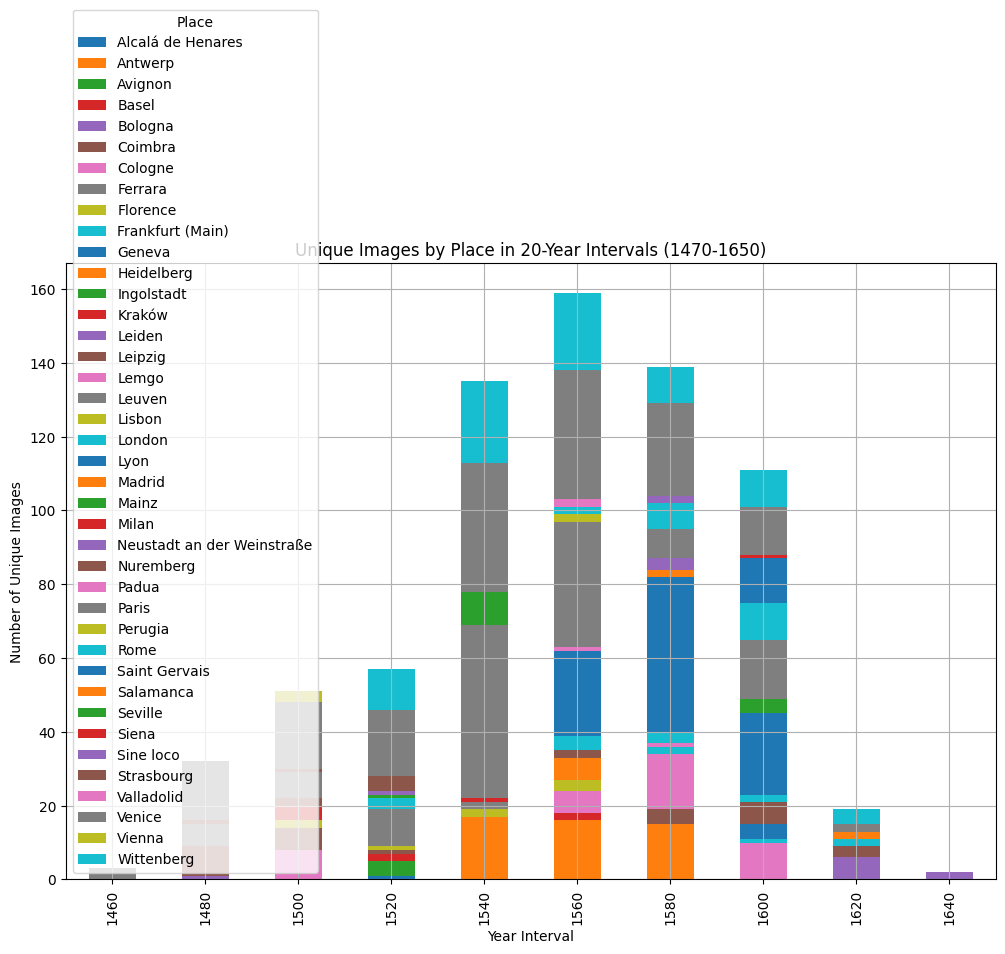

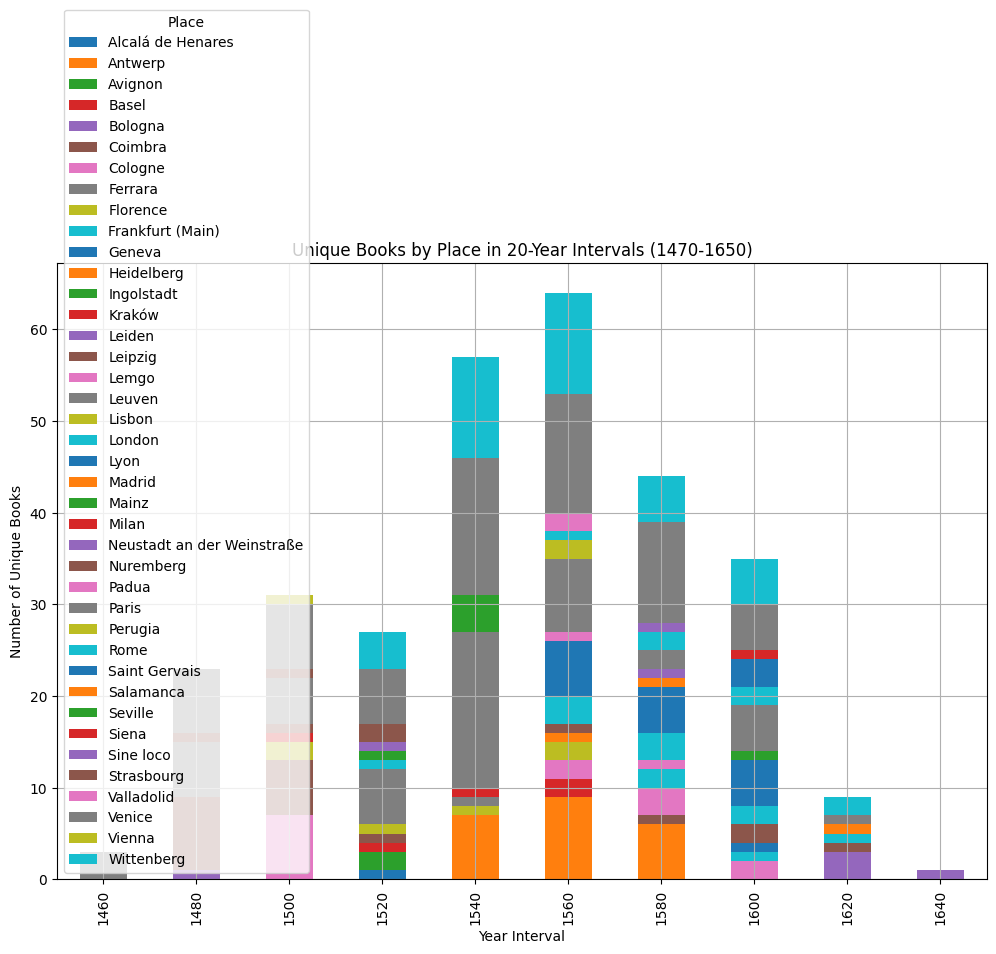

In [109]:
# Create 20-year intervals
lunar_eclipse['interval'] = (lunar_eclipse['year'] // 20) * 20

# Group by interval and place, and count unique images
grouped_images = lunar_eclipse.groupby(['interval', 'place'])['images'].nunique().unstack().fillna(0)

# Group by interval and place, and count unique books
grouped_books = lunar_eclipse.groupby(['interval', 'place'])['book'].nunique().unstack().fillna(0)

# Plot the data using a stacked bar chart for unique images
grouped_images.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.xlabel('Year Interval')
plt.ylabel('Number of Unique Images')
plt.title('Unique Images by Place in 20-Year Intervals (1470-1650)')
plt.legend(title='Place')
plt.grid(True)
plt.show()

# Plot the data using a stacked bar chart for unique books
grouped_books.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.xlabel('Year Interval')
plt.ylabel('Number of Unique Books')
plt.title('Unique Books by Place in 20-Year Intervals (1470-1650)')
plt.legend(title='Place')
plt.grid(True)
plt.show()


In [110]:
# Assuming lunar_eclipse is your DataFrame with columns 'images', 'place', and 'year'

# Group by place and find the earliest year and count of unique images
first_print = lunar_eclipse.groupby('place').agg({
    'year': 'min',
    'images': 'nunique'
}).reset_index()

# Rename columns for clarity
first_print.columns = ['Place', 'First Printed Year', 'Number of Unique Images']

# Sort by the first printed year
first_print_sorted = first_print.sort_values(by='First Printed Year')

# Display the table
print(first_print_sorted)


                         Place  First Printed Year  Number of Unique Images
7                      Ferrara                1472                        1
37                      Venice                1478                      164
4                      Bologna                1480                        1
15                     Leipzig                1486                       26
27                       Paris                1489                      128
35                  Strasbourg                1490                        6
6                      Cologne                1500                       39
18                      Lisbon                1509                        3
23                       Milan                1514                        5
25                   Nuremberg                1516                        2
38                      Vienna                1518                        3
2                      Avignon                1520                        1
34          

In [111]:
path_to_xlsx1 = 'C:\\Users\\nogas\\Image_data\\lunar_eclipse.xlsx'

In [112]:
visual_tagging = pd.read_excel(path_to_xlsx1)

In [113]:
visual_tagging

,cluster_name,non-proportional human figure,faces or other decorations of diagram,scale
0,SIL_00011,no,no,no
1,SIL_00012,no,no,no
2,SIL_00068,yes,yes,yes
3,SIL_00113,yes,yes,no
4,SIL_00114,no,no,no
...,...,...,...,...
100,SIL_03828,no,yes,no
101,SIL_03853,no,no,no
102,SIL_03878,no,yes,no
103,SIL_03880,yes,yes,no


In [114]:
# Merge based on cluster_name
lunar_eclipse_visual = pd.merge(lunar_eclipse, visual_tagging, on='cluster_name', how='left')

In [115]:
lunar_eclipse_visual

,Unnamed: 0,images,keywords,cluster_name,authors,publishers,printers,place,year,bid,book,part_or_adaption,part_or_adaption_label,pagenum,bb,part_type,interval,non-proportional human figure,faces or other decorations of diagram,scale
0,8,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,MVK_Pictorial_Illustrations;MTK_Lunar Eclipse_...,SIL_03194,"Catena, Pietro","Percacino, Grazioso","Percacino, Grazioso",Padua,1561,1597,http://sphaera.mpiwg-berlin.mpg.de/id/item/ba1...,http://sphaera.mpiwg-berlin.mpg.de/id/part/524...,Sphaera by P. Catena,41,"xywh=1895,411,1244,1397",influenced_100,1560,yes,yes,no
1,11,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,SK_4.4 Cause of lunar eclipse;SK_4.5 Cause of ...,SIL_02866,"Sacrobosco, Johannes de",Adam of Rottweil,Adam of Rottweil,Venice,1478,1611,http://sphaera.mpiwg-berlin.mpg.de/id/item/fea...,http://sphaera.mpiwg-berlin.mpg.de/id/part/c61...,Tractatus de sphaera,36,"xywh=61,1079,1313,399",100,1460,no,no,no
2,14,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,SK_4.4 Cause of lunar eclipse;CK_Solar Eclipse...,SIL_00114,"Sacrobosco, Johannes de","Fuscus, Dominicus","Fuscus, Dominicus",Bologna,1480,1613,http://sphaera.mpiwg-berlin.mpg.de/id/item/645...,http://sphaera.mpiwg-berlin.mpg.de/id/part/c61...,Tractatus de sphaera,40,"xywh=95,484,736,240",100,1480,no,no,no
3,45,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,SK_4.4 Cause of lunar eclipse;CK_Lunar Eclipse...,SIL_00012,"Sacrobosco, Johannes de","Landsberg, Martin","Landsberg, Martin",Leipzig,1486,1616,http://sphaera.mpiwg-berlin.mpg.de/id/item/c14...,http://sphaera.mpiwg-berlin.mpg.de/id/part/c61...,Tractatus de sphaera,63,"xywh=157,450,514,514",100,1480,no,no,no
4,48,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,SK_4.4 Cause of lunar eclipse;SK_4.5 Cause of ...,SIL_03701,"Sacrobosco, Johannes de;Peurbach, Georg von;Re...","Hopyl, Wolfgang","Hopyl, Wolfgang",Paris,1489,1618,http://sphaera.mpiwg-berlin.mpg.de/id/item/f03...,http://sphaera.mpiwg-berlin.mpg.de/id/part/c61...,Tractatus de sphaera,29,"xywh=122,341,841,698",100,1480,no,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703,21134,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,SK_4.4 Cause of lunar eclipse;CK_Lunar Eclipse...,SIL_01941,"Sacrobosco, Johannes de;Vinet, Élie;Hero, Albe...","Bellère, Jean","Bellère, Jean",Antwerp,1582,2281,http://sphaera.mpiwg-berlin.mpg.de/id/item/af4...,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,Giuntini's and new Vinet's commentary on the S...,133,"xywh=219,661,665,1031",adaption_100,1580,yes,yes,no
704,21135,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,SK_4.4 Cause of lunar eclipse;CK_Lunar Eclipse...,SIL_01610,"Sacrobosco, Johannes de;Vinet, Élie;Hero, Albe...","Bellère, Jean","Bellère, Jean",Antwerp,1582,2281,http://sphaera.mpiwg-berlin.mpg.de/id/item/af4...,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,Giuntini's and new Vinet's commentary on the S...,134,"xywh=647,793,817,958",adaption_100,1580,no,yes,no
705,21174,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,MVK_Pictorial_Diagrams;MTK_Solar Eclipse_Group...,SIL_00341,"Vinet, Élie;Sacrobosco, Johannes de;Hero, Albe...","Bellère, Jean","Bellère, Jean",Antwerp,1582,2281,http://sphaera.mpiwg-berlin.mpg.de/id/item/af4...,http://sphaera.mpiwg-berlin.mpg.de/id/part/47c...,Compendium by P. Valeriano,337,"xywh=138,1412,582,591",influenced_100,1580,no,no,no
706,21178,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,CK_Lunar Eclipse;MVK_Pictorial_Diagrams;MTK_Lu...,SIL_03550,"Sacrobosco, Johannes de;Vinet, Élie;Hero, Albe...","Bellère, Jean","Bellère, Jean",Antwerp,1582,2281,http://sphaera.mpiwg-berlin.mpg.de/id/item/af4...,http://sphaera.mpiwg-berlin.mpg.de/id/part/47c...,Compendium by P. Valeriano,341,"xywh=130,590,1067,1575",influenced_100,1580,no,yes,no


In [116]:
#first city
#last city
#highest number of prints - 5 cities, or cluster the cities by number of prints, than show the cities with the highest numbers? 
#how do we know if something intersting happened in a city with few prints? this can be a research question. is innovation always related to a big center with a large quantity of prints?

C:\Users\nogas\AppData\Local\Temp\ipykernel_107824\994219230.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_counts = yes_values.groupby(pd.cut(yes_values['year'], intervals, right=False, include_lowest=True, labels=intervals[:-1])).size()
C:\Users\nogas\AppData\Local\Temp\ipykernel_107824\994219230.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_counts = yes_values.groupby(pd.cut(yes_values['year'], intervals, right=False, include_lowest=True, labels=intervals[:-1])).size()
C:\Users\nogas\AppData\Local\Temp\ipykernel_107824\994219230.py:19: FutureWarning: The default of observed=False i

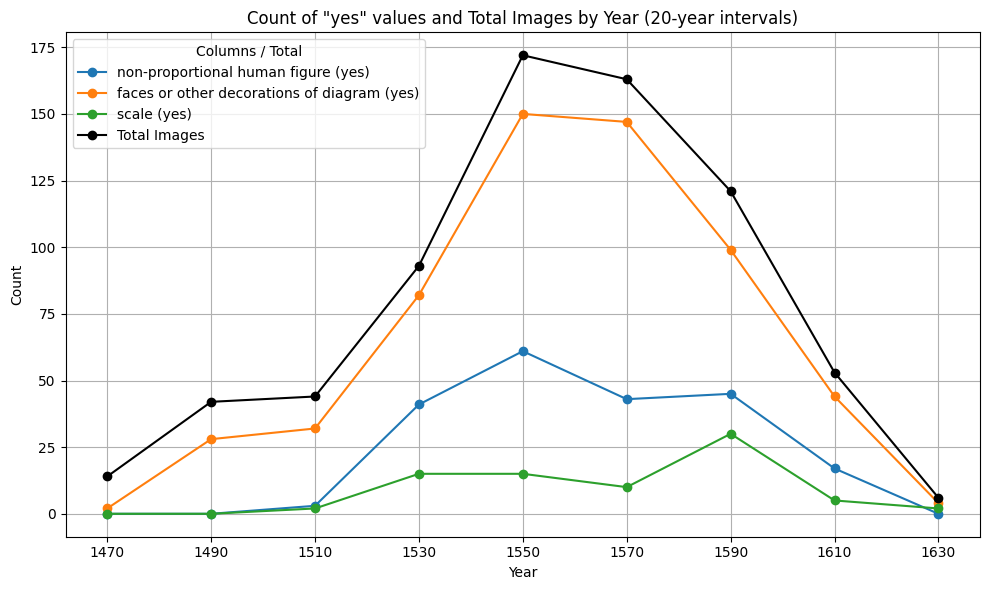

In [117]:
# Assuming lunar_eclipse_visual is your DataFrame and 'year' is already numeric and within the desired range

# Convert year to numeric if necessary
lunar_eclipse_visual['year'] = pd.to_numeric(lunar_eclipse_visual['year'], errors='coerce')

# Define twenty-year intervals
intervals = np.arange(1470, 1651, 20)

# Initialize figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each column with 'yes' values
for column in lunar_eclipse_visual.columns:
    if 'yes' in lunar_eclipse_visual[column].values:
        # Filter for 'yes' values
        yes_values = lunar_eclipse_visual[lunar_eclipse_visual[column] == 'yes']
        
        # Group by year intervals and count occurrences
        group_counts = yes_values.groupby(pd.cut(yes_values['year'], intervals, right=False, include_lowest=True, labels=intervals[:-1])).size()
        
        # Plot
        group_counts.plot(marker='o', linestyle='-', label=f'{column} (yes)')
    
# Plot total number of images per year interval
total_images = lunar_eclipse_visual.groupby(pd.cut(lunar_eclipse_visual['year'], intervals, right=False, include_lowest=True, labels=intervals[:-1]))['images'].nunique()
total_images.plot(marker='o', linestyle='-', color='black', label='Total Images')

# Configure plot
ax.set_title('Count of "yes" values and Total Images by Year (20-year intervals)')
ax.set_xlabel('Year')
ax.set_ylabel('Count')
ax.legend(title='Columns / Total', loc='upper left')
ax.grid(True)

plt.tight_layout()
plt.show()

In [118]:
# Sort the DataFrame by 'year' to get the earliest entries
sorted_lunar_eclipse_visual = lunar_eclipse_visual.sort_values(by='year')

# Select the top five earliest entries
earliest_five = sorted_lunar_eclipse_visual.head(10)

# Display the relevant columns
earliest_five_info = earliest_five[['place', 'cluster_name', 'year']]
print(earliest_five_info)


       place cluster_name  year
393  Ferrara    SIL_03900  1472
1     Venice    SIL_02866  1478
394   Venice    SIL_00114  1478
2    Bologna    SIL_00114  1480
374   Venice    SIL_02799  1482
375   Venice    SIL_00180  1482
384   Venice    SIL_00180  1485
383   Venice    SIL_03701  1485
3    Leipzig    SIL_00012  1486
376   Venice    SIL_00803  1488


C:\Users\nogas\AppData\Local\Temp\ipykernel_107824\1693508127.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_counts = place_data.groupby(pd.cut(place_data['year'], intervals, right=False, include_lowest=True, labels=intervals[:-1])).size()
C:\Users\nogas\AppData\Local\Temp\ipykernel_107824\1693508127.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_counts = place_data.groupby(pd.cut(place_data['year'], intervals, right=False, include_lowest=True, labels=intervals[:-1])).size()
C:\Users\nogas\AppData\Local\Temp\ipykernel_107824\1693508127.py:19: FutureWarning: The default of observed=Fals

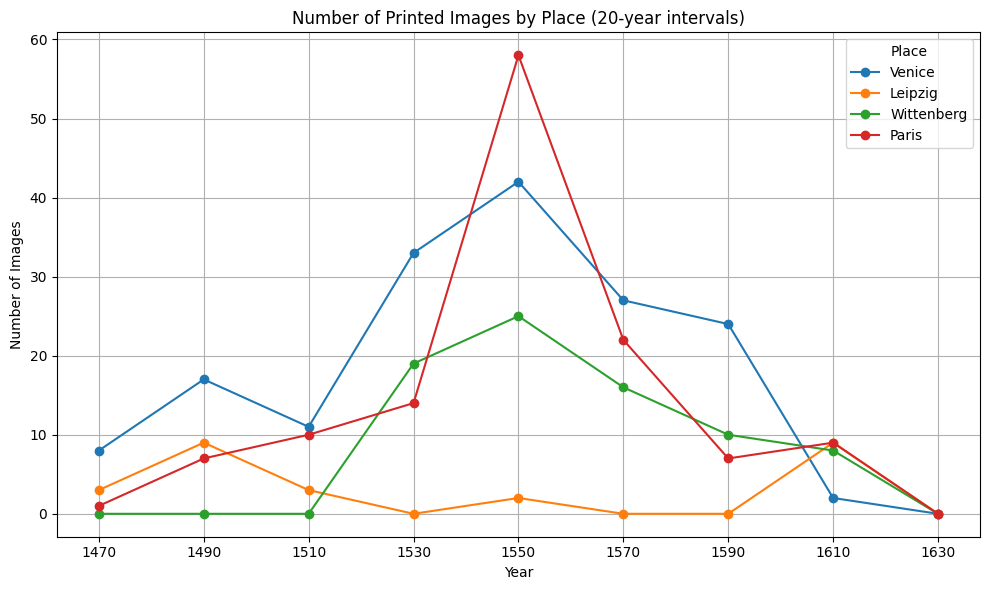

In [119]:
# Convert year to numeric if necessary
lunar_eclipse_visual['year'] = pd.to_numeric(lunar_eclipse_visual['year'], errors='coerce')

# Define twenty-year intervals
intervals = np.arange(1470, 1651, 20)

# List of places to plot
places = ['Venice', 'Leipzig', 'Wittenberg', 'Paris']

# Initialize figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each place
for place in places:
    # Filter for the place
    place_data = lunar_eclipse_visual[lunar_eclipse_visual['place'] == place]
    
    # Group by year intervals and count occurrences
    group_counts = place_data.groupby(pd.cut(place_data['year'], intervals, right=False, include_lowest=True, labels=intervals[:-1])).size()
    
    # Plot
    group_counts.plot(marker='o', linestyle='-', label=place)

# Configure plot
ax.set_title('Number of Printed Images by Place (20-year intervals)')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Images')
ax.legend(title='Place')
ax.grid(True)

plt.tight_layout()
plt.show()


C:\Users\nogas\AppData\Local\Temp\ipykernel_107824\3936060892.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  image_counts = place_data.groupby(pd.cut(place_data['year'], intervals, right=False, include_lowest=True, labels=intervals[:-1])).size()
C:\Users\nogas\AppData\Local\Temp\ipykernel_107824\3936060892.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  image_counts = place_data.groupby(pd.cut(place_data['year'], intervals, right=False, include_lowest=True, labels=intervals[:-1])).size()
C:\Users\nogas\AppData\Local\Temp\ipykernel_107824\3936060892.py:19: FutureWarning: The default of observed=Fals

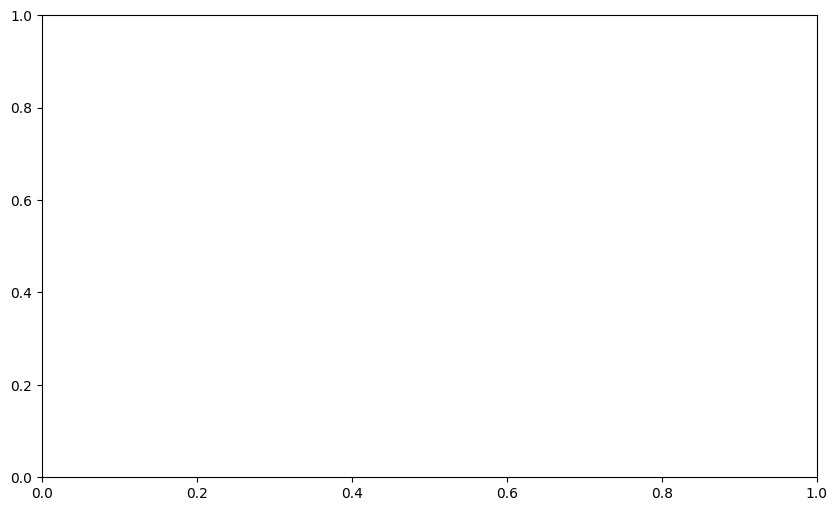

In [120]:
# Convert year to numeric if necessary
lunar_eclipse_visual['year'] = pd.to_numeric(lunar_eclipse_visual['year'], errors='coerce')

# Define twenty-year intervals
intervals = np.arange(1470, 1651, 20)

# List of places to plot
places = ['Venice', 'Leipzig', 'Wittenberg', 'Paris']

# Initialize figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each place
for place in places:
    # Filter for the place
    place_data = lunar_eclipse_visual[lunar_eclipse_visual['place'] == place]
    
    # Group by year intervals and count occurrences
    image_counts = place_data.groupby(pd.cut(place_data['year'], intervals, right=False, include_lowest=True, labels=intervals[:-1])).size()
    
    # Group by year intervals and count unique books
    unique_books = place_data
